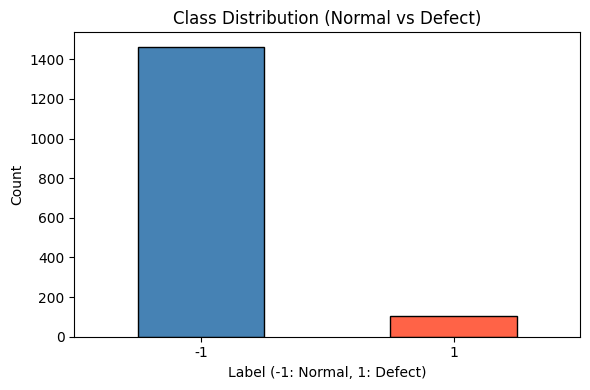

정상 샘플: 1463 (93.4%)
불량 샘플: 104 (6.6%)
불균형 비율: 14.1:1


In [7]:
# 레이블 컬럼 정리
labels.columns = ['label', 'timestamp']
y = labels['label']

# 클래스 불균형 시각화
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['steelblue', 'tomato'], edgecolor='black')
plt.title('Class Distribution (Normal vs Defect)')
plt.xlabel('Label (-1: Normal, 1: Defect)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/class_distribution.png', dpi=150)
plt.show()

print(f"정상 샘플: {(y == -1).sum()} ({(y == -1).sum()/len(y)*100:.1f}%)")
print(f"불량 샘플: {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")
print(f"불균형 비율: {(y == -1).sum() / (y == 1).sum():.1f}:1")

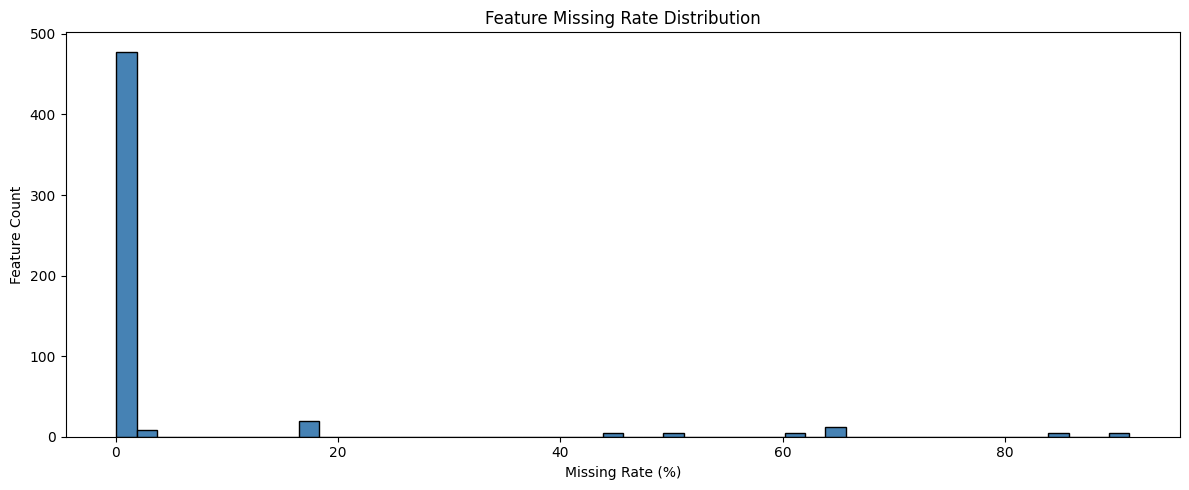

결측치 0%: 52
결측치 1~50%: 510
결측치 50~80%: 20
결측치 80% 이상: 8


In [8]:
# 결측치 비율 시각화
plt.figure(figsize=(12, 5))
missing_ratio[missing_ratio > 0].plot(kind='hist', bins=50, color='steelblue', edgecolor='black')
plt.title('Feature Missing Rate Distribution')
plt.xlabel('Missing Rate (%)')
plt.ylabel('Feature Count')
plt.tight_layout()
plt.savefig('../reports/missing_rate_distribution.png', dpi=150)
plt.show()

# 결측치 비율별 피처 수 요약
print("결측치 0%:", (missing_ratio == 0).sum())
print("결측치 1~50%:", ((missing_ratio > 0) & (missing_ratio <= 50)).sum())
print("결측치 50~80%:", ((missing_ratio > 50) & (missing_ratio <= 80)).sum())
print("결측치 80% 이상:", (missing_ratio > 80).sum())

In [2]:
# 결측치 확인
missing = data.isnull().sum()
missing_ratio = (missing / len(data) * 100).sort_values(ascending=False)

print("결측치 있는 피처 수:", (missing > 0).sum())
print("\n결측치 비율 상위 10개:")
print(missing_ratio.head(10))

결측치 있는 피처 수: 538

결측치 비율 상위 10개:
157    91.193363
292    91.193363
293    91.193363
158    91.193363
492    85.577537
358    85.577537
85     85.577537
220    85.577537
246    64.964901
109    64.964901
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('../data/secom.data', sep=' ', header=None)
labels = pd.read_csv('../data/secom_labels.data', sep=' ', header=None)

# 기본 확인
print("데이터 shape:", data.shape)
print("\n레이블 분포:")
print(labels[0].value_counts())

데이터 shape: (1567, 590)

레이블 분포:
0
-1    1463
 1     104
Name: count, dtype: int64
